Telcom Customer Churn
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7032 rows (customers) and 21 columns (features).

The “Churn” column is our target.

In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import plusmodules as pm
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('telco_chrun_encoded (1).csv')

In [7]:
df.shape

(7032, 25)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gender                           7032 non-null   int64  
 1   senior                           7032 non-null   int64  
 2   partner                          7032 non-null   int64  
 3   dependents                       7032 non-null   int64  
 4   tenure                           7032 non-null   int64  
 5   phone_service                    7032 non-null   int64  
 6   multiple_lines                   7032 non-null   int64  
 7   online_security                  7032 non-null   int64  
 8   online_backup                    7032 non-null   int64  
 9   device_protection                7032 non-null   int64  
 10  tech_support                     7032 non-null   int64  
 11  streaming_tv                     7032 non-null   int64  
 12  streaming_movies    

In [10]:
df.isnull().sum()

gender                             0
senior                             0
partner                            0
dependents                         0
tenure                             0
phone_service                      0
multiple_lines                     0
online_security                    0
online_backup                      0
device_protection                  0
tech_support                       0
streaming_tv                       0
streaming_movies                   0
paperless_billing                  0
monthly_charges                    0
total_charges                      0
churn                              0
avg_monthly_charges                0
internet_service-fiber_optic       0
internet_service-no                0
contract-one_year                  0
contract-two_year                  0
payment_method-credit_card_auto    0
payment_method-electronic_check    0
payment_method-mailed_check        0
dtype: int64

In [4]:
y=df['churn']
x=df.drop('churn', axis=1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)

Confusion Matrix - Train:  
 [[3442  403]
 [ 615  814]]
Overall Accuracy - Train:  0.806977626090254
AUC- Train: 0.8590076813106913
Confusion Matrix - Test:  
 [[1181  137]
 [ 192  248]]
Overall Accuracy - Test:  0.8128555176336746
AUC- Test: 0.8466952338253553
Classification Report - Test               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1318
           1       0.64      0.56      0.60       440

    accuracy                           0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.81      0.81      0.81      1758



Text(0, 0.5, 'TPR')

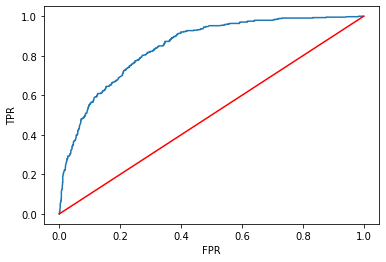

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve, classification_report
ada = AdaBoostClassifier(random_state=3)

ada.fit(x_train, y_train)

y_train_pred=ada.predict(x_train)

y_train_prob=ada.predict_proba(x_train)[:,1]

print('Confusion Matrix - Train: ', '\n' ,confusion_matrix(y_train, y_train_pred))

print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))


print('AUC- Train:' , roc_auc_score(y_train, y_train_prob))



y_test_pred= ada.predict(x_test)

y_test_prob=ada.predict_proba(x_test)[:,1]

print('Confusion Matrix - Test: ', '\n' ,confusion_matrix(y_test, y_test_pred))

print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

print('AUC- Test:' , roc_auc_score(y_test, y_test_prob))

print('Classification Report - Test', classification_report(y_test, y_test_pred))

fpr, tpr, thresholds =roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')

# light gbm classifier

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.


# Advantages of Light GBM

1. Faster training speed and higher efficiency: Light GBM use histogram based algorithm i.e it buckets continuous feature values into discrete bins which fasten the training procedure.
2. Lower memory usage: Replaces continuous values to discrete bins which result in lower memory usage.
3. Better accuracy than any other boosting algorithm: It produces much more complex trees by following leaf wise split approach rather than a level-wise approach which is the main factor in achieving higher accuracy. However, it can sometimes lead to 4. 4. 4. overfitting which can be avoided by setting the max_depth parameter.
5. Compatibility with Large Datasets: It is capable of performing equally good with large datasets with a significant reduction in training time as compared to XGBOOST.
5. Parallel learning supported.

In [13]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

params = {'n_estimators': sp_randint(50,200),
         'max_depth': sp_randint(2,15),
         'learning_rate': sp_uniform(0.001, 0.5),
         'num_leaves': sp_randint(20,50)}

rsearch = RandomizedSearchCV( lgbm, param_distributions = params, cv=3, n_iter=100, random_state=3, n_jobs=-1)

rsearch.fit(x,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023BFE00B24

In [18]:
rsearch.best_params_

{'learning_rate': 0.16390357903243724,
 'max_depth': 2,
 'n_estimators': 59,
 'num_leaves': 21}

Confusion Matrix - Train:  
 [[3504  341]
 [ 637  792]]
Overall Accuracy - Train:  0.8145620022753128
AUC- Train: 0.8629819246683732
Confusion Matrix - Test:  
 [[1187  131]
 [ 204  236]]
Overall Accuracy - Test:  0.8094425483503982
AUC- Test: 0.8478359084011587
Classification Report - Test               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1318
           1       0.64      0.54      0.58       440

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



Text(0, 0.5, 'TPR')

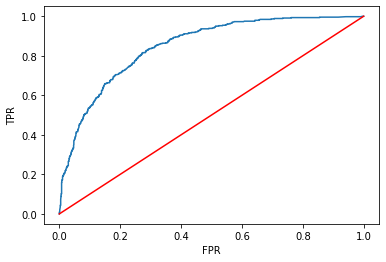

In [21]:
lgbm=lgb.LGBMClassifier(**rsearch.best_params_)

lgbm.fit(x_train, y_train)

y_train_pred=lgbm.predict(x_train)

y_train_prob=lgbm.predict_proba(x_train)[:,1]

print('Confusion Matrix - Train: ', '\n' ,confusion_matrix(y_train, y_train_pred))

print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

print('AUC- Train:' , roc_auc_score(y_train, y_train_prob))



y_test_pred= lgbm.predict(x_test)

y_test_prob=lgbm.predict_proba(x_test)[:,1]

print('Confusion Matrix - Test: ', '\n' ,confusion_matrix(y_test, y_test_pred))

print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

print('AUC- Test:' , roc_auc_score(y_test, y_test_prob))

print('Classification Report - Test', classification_report(y_test, y_test_pred))

fpr, tpr, thresholds =roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')